## Sprawozdanie4

**Data:** 2024-05-28
**Autor:** Piotr Szepietowski

## Wykorzystywane dalej biblioteki zewnętrzne Pythona

    - math
    - matplotlib
    - pandas
    - decimal


## Implementacja metod numerycznego rozwiązywania równań różniczkowych

    - Metoda Eulera - najprostsza metoda do numerycznego rozwiązywania równań różniczkowych, polegająca na liniowym przybliżeniu funkcji rozwiązania.

    -Metoda zmodyfikowana Eulera - ulepszona wersja metody Eulera, która polega na wprowadzeniu dodatkowego kroku korygującego, co zwiększa dokładność rozwiązania.

    - Metoda Heun’a - znana również jako metoda trapezów, która jest formą metody predyktor-korektor, wykorzystująca średnią wartość nachylenia w dwóch punktach.

    - Metoda Rungego-Kutty - bardziej zaawansowana metoda, która pozwala na uzyskanie lepszej dokładności dzięki wykorzystaniu kilku ocen nachylenia funkcji w jednym kroku iteracyjnym.

In [57]:
f = lambda x,y: x + y; 
def euler(x, y, h, target):
    while x < target:
        y += h * f(x, y)
        x += h
    return (x, y)

def modifiedEuler(x, y, h, target):
    while x < target:
        y += h * f(x + 0.5*h, y +0.5*h*f(x,y))
        x += h
    return (x,y)

def heun(x, y, h, target):
    while x < target:
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
    return (x, y)

def rungyKatt(x, y, h, target):
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6*(k1 + 2 * k2 + 2 * k3 + k4)
        x += h
    return (x, y)

print(euler(0, 1, 0.1, 0.1))
print(modifiedEuler(0, 1, 0.1, 0.1))
print(heun(0,1,0.1, 0.1))
print(rungyKatt(0,1,0.1, 0.1))

(0.1, 1.1)
(0.1, 1.11)
(0.1, 1.11)
(0.1, 1.1103416666666666)


## Warunki początkowe i zakres obliczeń
Celem projektu jest wyznaczenie i analiza maksymalnego błędu numerycznego dla różnych metod rozwiązywania równania różniczkowego określonego wzorem:
$$y' = f(x, y) = \frac{4x}{(1 + x^2)^{1/3}}$$
Porównanie będzie wykonane w odniesieniu do rozwiązania analitycznego wyrażonego przez funkcję: $g(t) = 3(1 + x^2)^{2/3} - 2.772$

   - Rozwiązania powinny być obliczone na przedziale $[-2, 2]$.
   - Warunek początkowy to $y(-2) = 6$.
   - Kroki integracji: $h = 0.5, 0.1, 0.01$.

3. **Analiza i porównanie błędów**:
   - Porównanie maksymalnych błędów numerycznych dla każdej metody w stosunku do rozwiązania analitycznego.
   - Wyniki należy przedstawić graficznie (5 przebiegów na jednym wykresie) oraz tabelarycznie.

c) **Analiza**:
   - Omówienie wyników, interpretacja błędów i ich zależności od wielkości kroku oraz typu metody.
   - Zalecenia, która metoda jest najbardziej efektywna w kontekście badanego równania.

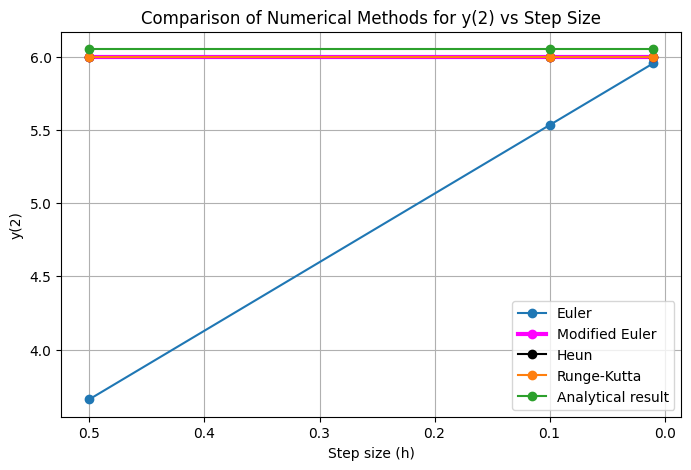

In [58]:
import pandas as pd
import math as m
f = lambda x, y: 4 * x / m.pow(1 + m.pow(x, 2), 1 / 3)

hArr = [0.5, 0.1, 0.01]
analitic = lambda x: 3 * (1 + x ** 2) ** (2/3) - 2.722
x0, y0, x1 = -2, 6, 2
results = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
errors = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
for h in hArr:
    results["euler"].append(euler(x0, y0, h, x1)[1])
    results["modified"].append(modifiedEuler(x0, y0, h, x1)[1])
    results["heun"].append(heun(x0, y0, h, x1)[1])
    results["katt"].append(rungyKatt(x0, y0, h, x1)[1])
    results["analytic"].append(analitic(x1))

    errors["euler"].append(euler(x0, y0, h, x1)[1] - analitic(x1))
    errors["modified"].append(modifiedEuler(x0, y0, h, x1)[1] - analitic(x1))
    errors["heun"].append(heun(x0, y0, h, x1)[1] - analitic(x1))
    errors["katt"].append(rungyKatt(x0, y0, h, x1)[1] - analitic(x1))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(hArr, results["euler"], marker='o', label='Euler')
plt.plot(hArr, results["modified"], marker='o', label='Modified Euler', linewidth=3, color='magenta')
plt.plot(hArr, results["heun"], marker='o', label="Heun", color="black")
plt.plot(hArr, results["katt"], marker='o', label="Runge-Kutta")
plt.plot(hArr, results["analytic"], marker='o', label="Analytical result")

plt.xlabel('Step size (h)')
plt.ylabel('y(2)')
plt.title('Comparison of Numerical Methods for y(2) vs Step Size')
plt.legend()
plt.gca().invert_xaxis()  # Optional: to show decreasing h left-to-right
plt.grid(True)
plt.show()

In [59]:
df_results = pd.DataFrame({
    'h': hArr,
    'Euler': results['euler'],
    'Euler error': errors['euler'],
    'Modified Euler': results['modified'],
    'Modified Euler error': errors['modified'],
    'Heun': results['heun'],
    'Heun error': errors['heun'],
    'Runge-Kutta': results['katt'],
    'Runge-Kutta error': errors['katt'],
    'Analytical': results['analytic']
})
df_results

,h,Euler,Euler error,Modified Euler,Modified Euler error,Heun,Heun error,Runge-Kutta,Runge-Kutta error,Analytical
0,0.50,3.660786,-2.389267,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053
1,0.10,5.532157,-0.517896,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053
2,0.01,5.953216,-0.096837,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053


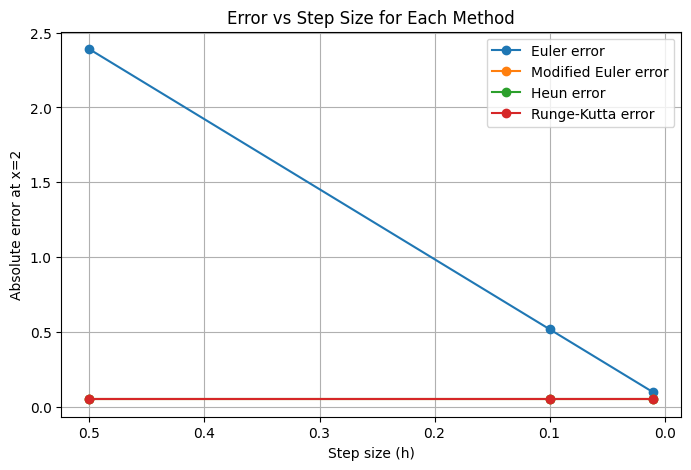

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(hArr, [abs(e) for e in errors["euler"]], marker='o', label='Euler error')
plt.plot(hArr, [abs(e) for e in errors["modified"]], marker='o', label='Modified Euler error')
plt.plot(hArr, [abs(e) for e in errors["heun"]], marker='o', label='Heun error')
plt.plot(hArr, [abs(e) for e in errors["katt"]], marker='o', label='Runge-Kutta error')

plt.xlabel('Step size (h)')
plt.ylabel('Absolute error at x=2')
plt.title('Error vs Step Size for Each Method')
plt.legend()
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

## Utworzenie wykresu przedstawiającego pośrednie wartości wyliczane podczas wyznaczania wartości funkcji z zależności od kroku

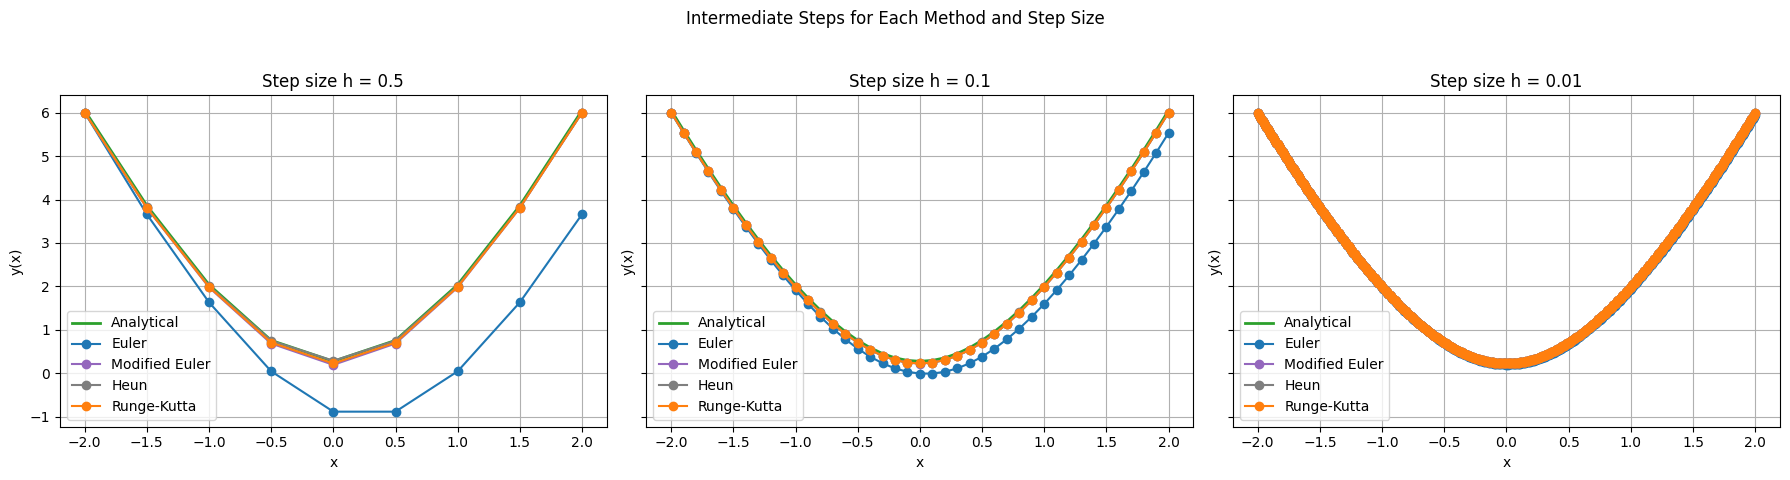

In [ ]:
def euler_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += h * f(x, y)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def modifiedEuler_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += h * f(x + 0.5*h, y + 0.5*h*f(x, y))
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def heun_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def rungyKatt_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6*(k1 + 2 * k2 + 2 * k3 + k4)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def analytic_points(x0, x1, h):
    xs = []
    ys = []
    x = x0
    while x <= x1 + 1e-10:
        xs.append(x)
        ys.append(3 * (1 + x ** 2) ** (2/3) - 2.722)
        x += h
    return xs, ys

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
h_labels = [str(h) for h in hArr]
methods = [
    ('Euler', euler_points, 'tab:blue'),
    ('Modified Euler', modifiedEuler_points, 'tab:purple'),
    ('Heun', heun_points, 'tab:gray'),
    ('Runge-Kutta', rungyKatt_points, 'tab:orange'),
]

for idx, (h, label) in enumerate(zip(hArr, h_labels)):
    # Plot analytical solution
    xs_analytic, ys_analytic = analytic_points(x0, x1, h)
    axs[idx].plot(xs_analytic, ys_analytic, label='Analytical', color='tab:green', linewidth=2)
    # Plot each method
    for name, func, color in methods:
        xs, ys = func(x0, y0, h, x1)
        axs[idx].plot(xs, ys, marker='o', label=name, color=color)
    axs[idx].set_title(f"Step size h = {label}")
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('y(x)')
    axs[idx].grid(True)
    axs[idx].legend()

plt.suptitle('Intermediate Steps for Each Method and Step Size')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()